In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

In [2]:
#Import Dataset
dataset = pd.read_csv(r'C:\Users\mannami\Desktop\Python\DL Class\SOM\Credit_Card_Applications.csv')

In [3]:
#Split data by class = 1 or 0 (accepted or not)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
#Feature Scaling
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [5]:
#Training the SOM

#Initialize SOM
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
#Initialize Weights
som.random_weights_init(X)
#Train SOM
som.train_random(X, 100)

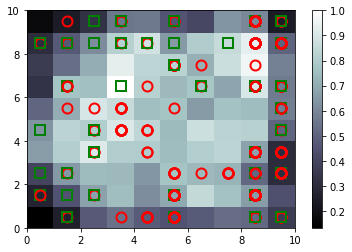

In [6]:
#Visualize Results

#Initialize the window containing the map
bone()
#Color nodes by mean inter-neuron distances
pcolor(som.distance_map().T)
#Legend
colorbar()
# Mark customers with green square if they did not get approval, red circle if did get approval
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor=colors[y[i]], 
         markerfacecolor= 'None', markersize=10, markeredgewidth=2)
show()

In [7]:
#Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,8)], mappings[(8,7)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [8]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15719940
15651868
15716082
15761158
15711742
15761733
15770995
15651460
15672637
15736399
15766734
15752344
15736533
15667934
15779207
15665087
15611409
15636454
15608916
15615296
15792107


Go from Unsupervised to Supervised Deep Learning

In [10]:
#Create Matrix of features
customers = dataset.iloc[:, 1:].values

In [11]:
#Create Dependent Variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

Build ANN

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

classifier = Sequential()
classifier.add(tf.keras.layers.Dense(units=2, kernel_initializer = 'uniform', activation='relu', input_dim=15))
classifier.add(tf.keras.layers.Dense(units=1, kernel_initializer = 'uniform', activation='sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 0s 620us/step - loss: 0.4932 - accuracy: 0.9696
Epoch 2/2
690/690 [==============================] - 0s 485us/step - loss: 0.2340 - accuracy: 0.9696


In [15]:
#Predict Probabilities of frauds
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]
print(y_pred)

[[1.56548590e+07 1.98790431e-03]
 [1.57250280e+07 2.00751424e-03]
 [1.55664950e+07 2.51773000e-03]
 ...
 [1.57876930e+07 3.02879453e-01]
 [1.57278110e+07 3.02879453e-01]
 [1.57205290e+07 3.02879453e-01]]
